In [2]:
import scipy
import numpy as np
from itertools import product
from matplotlib import pyplot as plt

In [3]:
shipping_cost = np.array([[1,3],[3,2],[2,2]]).reshape(3,2)
production_cost = np.array([6,5]).reshape(1,2)
given_demand = np.array([[50,60,75],[75,90,100],[60,75,90]]).reshape(3,3)
produce_limit = np.array([250,250]).reshape(2,1)

In [4]:
products = (list(product(range(3),repeat=3)))
senarios = [[given_demand[i][j]  for i,j in enumerate(pro)] for pro in products]

destruct_senarios = np.random.binomial(1,0.3,(100,3,2))
destruct_units = np.where(destruct_senarios == 1, 0.5, 1)

In [5]:
senarios

[[np.int64(50), np.int64(75), np.int64(60)],
 [np.int64(50), np.int64(75), np.int64(75)],
 [np.int64(50), np.int64(75), np.int64(90)],
 [np.int64(50), np.int64(90), np.int64(60)],
 [np.int64(50), np.int64(90), np.int64(75)],
 [np.int64(50), np.int64(90), np.int64(90)],
 [np.int64(50), np.int64(100), np.int64(60)],
 [np.int64(50), np.int64(100), np.int64(75)],
 [np.int64(50), np.int64(100), np.int64(90)],
 [np.int64(60), np.int64(75), np.int64(60)],
 [np.int64(60), np.int64(75), np.int64(75)],
 [np.int64(60), np.int64(75), np.int64(90)],
 [np.int64(60), np.int64(90), np.int64(60)],
 [np.int64(60), np.int64(90), np.int64(75)],
 [np.int64(60), np.int64(90), np.int64(90)],
 [np.int64(60), np.int64(100), np.int64(60)],
 [np.int64(60), np.int64(100), np.int64(75)],
 [np.int64(60), np.int64(100), np.int64(90)],
 [np.int64(75), np.int64(75), np.int64(60)],
 [np.int64(75), np.int64(75), np.int64(75)],
 [np.int64(75), np.int64(75), np.int64(90)],
 [np.int64(75), np.int64(90), np.int64(60)],
 [np

In [6]:
num_senario = len(senarios)
num_dest_senario = len(destruct_senarios)

#create empty numpy array
Resource_lft = np.array([])

In [7]:
for demand in senarios:
        for destruct in destruct_units:
            transport_mat = np.zeros((3,6))

            for ind,i in enumerate(demand):
                transport_mat[ind,2*ind] = destruct[ind][0]
                transport_mat[ind,2*ind+1] = destruct[ind][1]

            Resource_lft = np.append(Resource_lft,transport_mat)
Resource_lft = Resource_lft.reshape(num_dest_senario*num_senario*3,6)

In [8]:
list(Resource_lft)

[array([1., 1., 0., 0., 0., 0.]),
 array([0., 0., 1., 1., 0., 0.]),
 array([0. , 0. , 0. , 0. , 1. , 0.5]),
 array([1., 1., 0., 0., 0., 0.]),
 array([0., 0., 1., 1., 0., 0.]),
 array([0., 0., 0., 0., 1., 1.]),
 array([1., 1., 0., 0., 0., 0.]),
 array([0. , 0. , 0.5, 1. , 0. , 0. ]),
 array([0., 0., 0., 0., 1., 1.]),
 array([1., 1., 0., 0., 0., 0.]),
 array([0., 0., 1., 1., 0., 0.]),
 array([0. , 0. , 0. , 0. , 1. , 0.5]),
 array([1., 1., 0., 0., 0., 0.]),
 array([0., 0., 1., 1., 0., 0.]),
 array([0., 0., 0., 0., 1., 1.]),
 array([1. , 0.5, 0. , 0. , 0. , 0. ]),
 array([0. , 0. , 0.5, 1. , 0. , 0. ]),
 array([0., 0., 0., 0., 1., 1.]),
 array([1. , 0.5, 0. , 0. , 0. , 0. ]),
 array([0. , 0. , 0.5, 1. , 0. , 0. ]),
 array([0. , 0. , 0. , 0. , 1. , 0.5]),
 array([1., 1., 0., 0., 0., 0.]),
 array([0. , 0. , 0.5, 1. , 0. , 0. ]),
 array([0., 0., 0., 0., 1., 1.]),
 array([1., 1., 0., 0., 0., 0.]),
 array([0. , 0. , 1. , 0.5, 0. , 0. ]),
 array([0. , 0. , 0. , 0. , 0.5, 0.5]),
 array([0.5, 0.5

In [9]:
optimals = []

In [10]:
for i in range(100):
    products = (list(product(range(3),repeat=3)))
    senarios = [[given_demand[i][j]  for i,j in enumerate(pro)] for pro in products]

    destruct_senarios = np.random.binomial(1,0.3,(100,3,2))
    destruct_units = np.where(destruct_senarios == 1, 0.5, 1)

    num_senario = len(senarios)
    num_dest_senario = len(destruct_senarios)

    #create empty numpy array
    Resource_lft = np.array([])
    demand_array = np.array([])

    for demand in senarios:
        for destruct in destruct_units:
            transport_mat = np.zeros((3,6))

            for ind,i in enumerate(demand):
                transport_mat[ind,2*ind] = destruct[ind][0]
                transport_mat[ind,2*ind+1] = destruct[ind][1]
                demand_array =  np.append(demand_array,i)

            Resource_lft = np.append(Resource_lft,transport_mat)
    Resource_lft = Resource_lft.reshape(num_dest_senario*num_senario*3,6)


    # Shortfall Matrix 
    Shortfall_lft = np.eye(num_senario*num_dest_senario*3)

    # Allocation Matrix
    Resource_lft = Resource_lft.reshape(num_dest_senario*num_senario*3,6)

    # Demand Matrix
    demand_rgt = demand_array.reshape(num_dest_senario*num_senario*3,1)

    # Production Matrix
    Production_lft = np.repeat([[0,0],[0,0],[0,0]],num_dest_senario*num_senario,axis=0)

    # Constraint Matrix
    A1_ub = -1*np.concatenate((Production_lft,Resource_lft,Shortfall_lft),axis=1)
    b1_ub = -1*demand_rgt

    # Balance Matrix
    Balance_lft = np.array([[-1,0,1,0,1,0,1,0],[0,-1,0,1,0,1,0,1]])
    Dummy_lft = np.zeros((2,len(Shortfall_lft)))

    # Concatenate
    A2_ub = np.concatenate((Balance_lft,Dummy_lft),axis=1)
    b2_ub = np.array([0,0]).reshape(2,1)

    A_ub = np.concatenate((A1_ub,A2_ub),axis=0)
    b_ub = np.concatenate((b1_ub,b2_ub),axis=0)

    obj =[]
    bound = []

    for i in production_cost:
        obj.extend(i)

    for i in produce_limit:
        bound.append([0,i[0]])

    for i in shipping_cost:
        for j in i:
            obj.extend([j])
            bound.append([0,250])

    for i in range(3*num_senario*num_dest_senario):
        obj.extend([40/(num_dest_senario*num_senario)])
        bound.append([0,float("inf")])

        
    # Solve
    obj = scipy.optimize.linprog(c=obj, A_ub=A_ub, b_ub=b_ub, bounds=bound, method='highs')

    optimal_value = obj.fun
    optimal_production = obj.x[:2]
    optimal_shipping = obj.x[2:8]

    optimals.append([optimal_value,optimal_production,optimal_shipping])

    

MemoryError: Unable to allocate 501. MiB for an array with shape (8100, 8108) and data type float64

In [ ]:
optimal_values = [i[0] for i in optimals]
optimal_productions = [i[1] for i in optimals]
optimal_shippings = [i[2] for i in optimals]

(array([ 1.,  4.,  4., 10., 13., 19., 28.,  9.,  8.,  4.]),
 array([2624. , 2649.4, 2674.8, 2700.2, 2725.6, 2751. , 2776.4, 2801.8,
        2827.2, 2852.6, 2878. ]),
 <BarContainer object of 10 artists>)

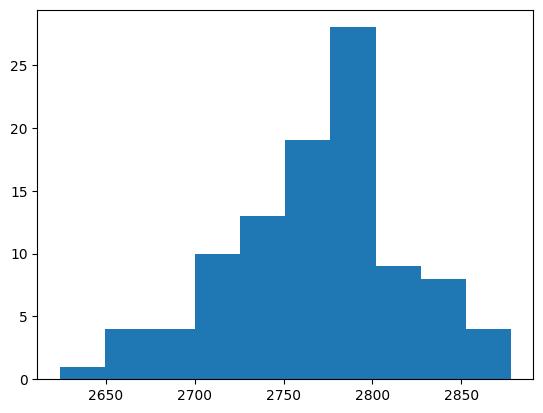

In [29]:
plt.hist(optimal_values,bins=10)

In [91]:
obj

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 2733.3333333333085
              x: [ 9.333e+01  2.033e+02 ...  2.500e+01  3.000e+01]
            nit: 3787
          lower:  residual: [ 9.333e+01  2.033e+02 ...  2.500e+01
                              3.000e+01]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          upper:  residual: [ 1.567e+02  4.667e+01 ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  2.500e+01 ...  0.000e+00
                              0.000e+00]
                 marginals: [-1.481e-02 -0.000e+00 ... -6.000e+00
                             -5.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        m

In [73]:
obj.x[:8]

array([160., 160.,  60.,  30.,  60.,  60.,  40.,  70.])

(array([ 1.,  1.,  5.,  4., 17., 30., 19.,  9., 12.,  2.]),
 array([ 60. ,  72.5,  85. ,  97.5, 110. , 122.5, 135. , 147.5, 160. ,
        172.5, 185. ]),
 <BarContainer object of 10 artists>)

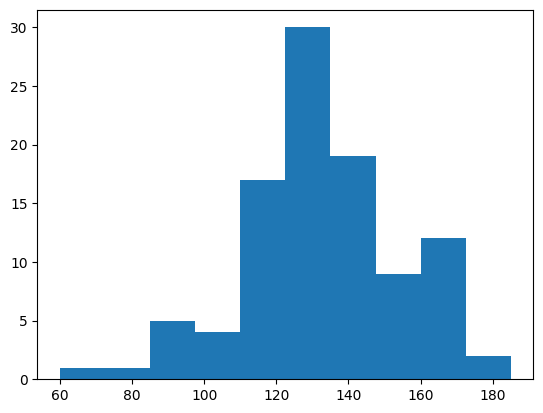

In [36]:
plt.hist(np.array(optimal_productions)[:,0],bins=10)

(array([ 1.,  1.,  4., 10., 22., 20., 25., 12.,  3.,  2.]),
 array([110., 121., 132., 143., 154., 165., 176., 187., 198., 209., 220.]),
 <BarContainer object of 10 artists>)

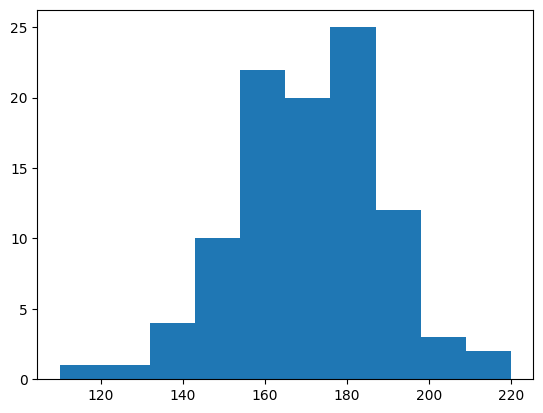

In [37]:
plt.hist(np.array(optimal_productions)[:,1],bins=10)

In [1]:
optimal_shippings

NameError: name 'optimal_shippings' is not defined